# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  
Created by Nathan M., (015519257,) , Aye Nyein Kyaw (018005065), Jiaying L (016057756)  
Last updated: 10/9/25  

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datasetURL = "https://raw.githubusercontent.com/CS133-DataVisualization/term-project-discombobulated-incompacitators-team-3/refs/heads/main/Project%20Assignments/data/2022-23%20financial%20and%20utilization%20report.csv"
ourHealthDataset = pd.read_csv(datasetURL)
ourHealthDataset = ourHealthDataset.set_index(["index"])
print(ourHealthDataset.isnull().sum())


FAC_NO              0
FAC_NAME            0
YEAR_QTR            0
BEG_DATE            0
END_DATE            0
                   ..
CAP_PREM_REV_CC     0
NET_PAT_REV_CC      0
QA_FEES             0
QA_SUPPL_PAY        0
MNGD_CARE_QA_PAY    0
Length: 133, dtype: int64


In [ ]:
ourHealthDataset.dtypes

,0
FAC_NO,int64
FAC_NAME,object
YEAR_QTR,int64
BEG_DATE,object
END_DATE,object
...,...
CAP_PREM_REV_CC,int64
NET_PAT_REV_CC,int64
QA_FEES,int64
QA_SUPPL_PAY,int64


Date Conversion :   

to_iso_date(series)

- Convert everything to strings and strip spaces.

- Extract YYYY-MM-DD if present.

- For the rest, look for MM/DD/YYYY, parse with a fixed format, and reformat to YYYY-MM-DD.

- Use a last-chance general parser for stragglers.

- Return a Series of strings in ISO YYYY-MM-DD (missing stays missing only if truly unparsable).

Apply the function to BEG_DATE and END_DATE.

Show a quick sanity check (head/tail + NaN counts).

In [ ]:
def to_iso_date(series: pd.Series) -> pd.Series:
    # force everything to string
    s = series.astype(str).str.strip() # .str.strip() removes leading/trailing spaces that can break parsing.

    # 1 Grab YYYY-MM-DD if present (this also covers strings like "2022-01-01 0:00:00")
    ymd = s.str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False)

    # 2 For the rest, grab MM/DD/YYYY and convert to ISO
    mask = ymd.isna()
    mmdd = s[mask].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})', expand=False)

    # Convert any MM/DD/YYYY we found into ISO
    mmdd_iso = pd.to_datetime(mmdd, format="%m/%d/%Y", errors="coerce").dt.strftime("%Y-%m-%d")

    # 3 Merge results: prefer the YYYY-MM-DD we extracted; fill remaining with converted MM/DD/YYYY
    out = ymd.copy()
    out.loc[mask] = mmdd_iso

    # 4 Last-chance parse for anything weird but valid
    still_missing = out.isna()
    if still_missing.any():
        fallback = pd.to_datetime(s[still_missing], errors="coerce").dt.strftime("%Y-%m-%d")
        out.loc[still_missing] = fallback

    return out


# apply function
for c in ["BEG_DATE", "END_DATE"]:
    ourHealthDataset[c] = to_iso_date(ourHealthDataset[c])

In [ ]:
ourHealthDataset.head()

,FAC_NO,FAC_NAME,YEAR_QTR,BEG_DATE,END_DATE,OP_STATUS,COUNTY_NAME,HSA,HFPA,TYPE_CNTRL,...,TOT_OUT_VIS_CC,GROS_INPAT_REV_CC,GROS_OUTPAT_REV_CC,CONTR_ADJ_CC,OTHR_DEDUCT_CC,CAP_PREM_REV_CC,NET_PAT_REV_CC,QA_FEES,QA_SUPPL_PAY,MNGD_CARE_QA_PAY
index,,,,,,,,,,,,,,,,,,,,,
1,106580996,ADVENTIST HEALTH AND RIDEOUT,20234,2023-10-01,2023-12-31,Open,Yuba,02 - Golden Empire,227,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
2,106150788,ADVENTIST HEALTH BAKERSFIELD,20234,2023-10-01,2023-12-31,Open,Kern,09 - Central,617,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
3,106171049,ADVENTIST HEALTH CLEARLAKE,20234,2023-10-01,2023-12-31,Open,Lake,01 - Northern California,115,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
4,106150706,ADVENTIST HEALTH DELANO,20234,2023-10-01,2023-12-31,Open,Kern,09 - Central,617,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
5,106190323,ADVENTIST HEALTH GLENDALE,20234,2023-10-01,2023-12-31,Open,Los Angeles,11 - Los Angeles,909,Church,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ourHealthDataset.tail()

,FAC_NO,FAC_NAME,YEAR_QTR,BEG_DATE,END_DATE,OP_STATUS,COUNTY_NAME,HSA,HFPA,TYPE_CNTRL,...,TOT_OUT_VIS_CC,GROS_INPAT_REV_CC,GROS_OUTPAT_REV_CC,CONTR_ADJ_CC,OTHR_DEDUCT_CC,CAP_PREM_REV_CC,NET_PAT_REV_CC,QA_FEES,QA_SUPPL_PAY,MNGD_CARE_QA_PAY
index,,,,,,,,,,,,,,,,,,,,,
434,106190857,WEST COVINA MEDICAL CENTER,20221,2022-01-01,2022-03-31,Open,Los Angeles,11 - Los Angeles,915,Investor - Corp.,...,0,0,0,0,0,0,0,0,0,0
435,106190859,WEST HILLS HOSPITAL AND MEDICAL CENTER,20221,2022-01-01,2022-03-31,Open,Los Angeles,11 - Los Angeles,905,Investor - Corp.,...,0,0,0,0,0,0,0,0,0,0
436,106190883,WHITTIER HOSPITAL MEDICAL CENTER,20221,2022-01-01,2022-03-31,Open,Los Angeles,11 - Los Angeles,919,Investor - Corp.,...,0,0,0,0,0,0,0,0,0,0
437,106571086,WOODLAND MEMORIAL HOSPITAL,20221,2022-01-01,2022-03-31,Open,Yolo,02 - Golden Empire,313,Non Profit Corp.,...,0,0,0,0,0,0,0,0,0,0
438,106380939,ZUCKERBERG SAN FRANCISCO GENERAL HOSPITAL & TR...,20221,2022-01-01,2022-03-31,Open,San Francisco,04 - West Bay,423,City/County,...,0,0,0,0,0,0,0,0,0,0


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

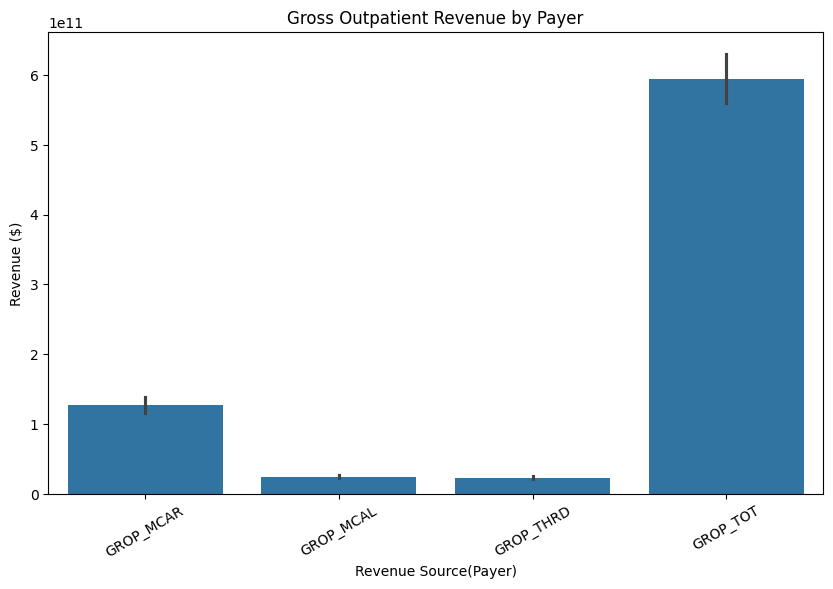

In [ ]:
# Your code here . . .

#Notes: make the plot into a comparative bar plot to show diff. b/n managed care and traditional then find a way to show they add up to the total?

revenue_cols = {
    "Medicare Traditional": "GROP_MCAR",
    "Medi-Cal Traditional": "GROP_MCAL",
    "Other Third Parties": "GROP_THRD",
    "Total": "GROP_TOT"
}

# Melt the dataframe to long format
dataLong = ourHealthDataset[list(revenue_cols.values())].melt(
    var_name="Payer",
    value_name="Revenue"
)

# Replace column codes with readable labels
dataLong["Payer"] = dataLong["Payer"].replace(revenue_cols)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Payer", y="Revenue", data=dataLong, estimator=np.sum)
plt.xticks(rotation=30)
plt.title("Gross Outpatient Revenue by Payer")
plt.xlabel("Revenue Source(Payer)")
plt.ylabel("Revenue ($)")
plt.show()

### Q3: Come up with a another unique question. This question must use map() or apply()

In [13]:
# Calculate the cost per charge of hospitals
# How much does the hospital charged for each $1 charged to patients

#ourHealthDataset.insert(loc=6, column='Cost_Charge_Ratio', value=0)
ourHealthDataset['Cost_Charge_Ratio'] = ourHealthDataset.apply(
    lambda row: (row['TOT_OP_EXP']-row['OTH_OP_REV']) / (row['GRIP_TOT']+row['GROP_TOT']) if (row['GRIP_TOT']+row['GROP_TOT']) > 0 else 0,
    axis=1
)
ourHealthDataset['Cost_Charge_Ratio']

,Cost_Charge_Ratio
index,
1,0.240109
2,0.169823
3,0.351411
4,0.399879
5,0.155711
...,...
434,0.254994
435,0.078420
436,0.177443


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [ ]:
# Your code here . . .

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

###Summary
Additional datasets of different years and quarters were merged into a singular dataset for data exploration. Since the datasets consist of the same columns, so we only needed to merge the csv files vertically and take out the headers for each additional dataset we want to merge.   


```
import pandas as pd

merged_data = pd.read_csv(original csv file url)
header = merged_data.columns.toList()
url = [list of csv file urls]

for file in url:
  new_file = pd.read_csv(file)
  merged_data = pd.merge(merged_data, new_file, on=header, how='inner')
```
